In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import functions
import PCN

In [10]:
import MDAnalysis as mda
pdb = '/Users/jasminguven/Downloads/1vcr.pdb'
u = mda.Universe(pdb)
segments = u.residues.segments

number_of_segments = len(segments)
segment_id = segments.segids

print(len(segment_id))

1


In [2]:
def create_connected_component_subgraphs(protein_graph):
    """
    Take a protein graph and create connected component subgraphs.

    Parameters
    ----------
    protein_graph: nx.graph()
        protein graph containing the links

    Return
    ------
    cc_subgraph: nx.subgraph() generator
        subgraph of connected components in the protein graph
    """
    for components in nx.connected_components(protein_graph):
        yield protein_graph.subgraph(components)

there was more than one subgraph
[]


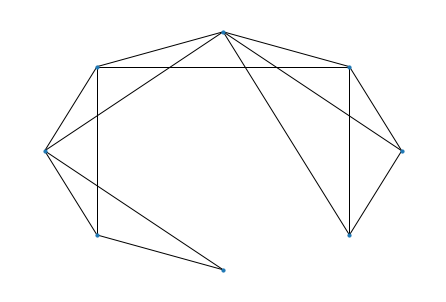

In [126]:
import MDAnalysis as mda
PDB_file = '/Volumes/Seagate_Extension_Plus/PDBs/pdb6alb.ent'
# pcn = PCN.PCN(PDB_file)
# c = pcn.get_C_alphas()
# print(c)
# c_pos = c.positions

u = mda.Universe(PDB_file)
segments = u.residues.segments

number_of_segments = len(segments)
segment_id = u.residues.segments.segids[0]

atoms_in_protein = (u.select_atoms(f'protein'))
#print(atoms_in_protein)
# for i in c:

mda_altLocs = atoms_in_protein.altLocs
alternative_locations = []
for loc in mda_altLocs:
    if loc != '':
        alternative_locations.append(loc)

alternative_locations = np.sort(list(set(alternative_locations)))
n_altLocs = len(alternative_locations)

if n_altLocs > 1:
    
    first_altLoc = alternative_locations[0]
    
    residues = atoms_in_protein.residues.resids
    #print(residues[0],residues[-1])

    CA = u.select_atoms(f'resid {residues[0]}:{residues[-1]} and name CA and segid {segment_id[0]}')
    

    for i in range(1, n_altLocs):
        print(i)
        ag = u.select_atoms(f'resid {residues[0]}:{residues[-1]} and name CA and segid {segment_id[0]} and altLoc {alternative_locations[i]}')
        #print(CA_not_i)
        CA -= ag
else:
    residues = atoms_in_protein.residues.resids

    CA = u.select_atoms(f'resid {residues[0]}:{residues[-1]} and name CA and segid {segment_id[0]}')

    
n_residues = len(atoms_in_protein.residues)
#print(n_residues)

    
n_CA = len(CA)
parent_graph = nx.empty_graph(n_CA)


c_pos = CA.positions


for i in range(n_CA):
    for j in range(i):
        dist = np.linalg.norm(c_pos[i] - c_pos[j])
        if dist < 8:
            parent_graph.add_edge(i,j)

subgraphs = list(create_connected_component_subgraphs(parent_graph))
#print(len(subgraphs))
nx.draw_circular(subgraphs[1], node_size = 10)      

n_parent_edges = len(parent_graph.edges())
n_parent_nodes = len(parent_graph.nodes())
link_lengths = []

if n_parent_edges > 0:
    
    subgraphs = list(create_connected_component_subgraphs(parent_graph))
    n_subgraphs = len(subgraphs)
    
    if n_subgraphs > 1:
      #  print(subgraphs[0].nodes(), subgraphs[1].nodes())


        print('there was more than one subgraph')
        
    else:
        protein_graph = subgraphs[0]
        #print(protein_graph)
        n_protein_graph_nodes = len(protein_graph.nodes())
        #print(protein_graph.nodes())
        #print(protein_graph.edges())


        if n_parent_nodes != n_protein_graph_nodes:
            print('the parent graph nodes does not equal protein graph nodes')
        else:
            cycle_graph = nx.cycle_graph(n_parent_nodes)
            links = list(set(protein_graph.edges()) - set(cycle_graph.edges()))
            #print(links)
            for link in links:
                if (abs(link[0] - link[1])) <= 1:
                    print('there is a link length of 1')
                else:
                    link_length = abs(link[0]-link[1])
                    link_lengths.append(link_length)
print(link_lengths)

In [13]:
big_graph = nx.empty_graph(len(c_pos))
for i in range(len(c_pos)):
    for j in range(i):
        dist = np.linalg.norm(c_pos[i] - c_pos[j])
        if dist < 8:
            big_graph.add_edge(i,j)
            
        
sub_graphs = list(create_connected_component_subgraphs(big_graph)) # add a check here why others are empty
print(len(sub_graphs[0]), len(sub_graphs[1]))
# print(len(big_graph), len(prot_graph))
# for p in prot_graph:
#     print(p)
prot_graph = sub_graphs[0]
nodes = prot_graph.nodes()
#print(nodes)

#print(len(nodes))
cycle_graph = nx.cycle_graph(nodes)
nodes = len(prot_graph.nodes())
# print((prot_graph.edges()))
# print(nx.cycle_graph(nodes).edges())

links = list(set(prot_graph.edges()) - set(nx.cycle_graph(len(big_graph)).edges()))
#print(len(links))

# nx.draw_circular(prot_graph,node_size=10 )

# link_lengths = []
# for link in links: 
#     ll = abs(link[0] - link[1])
#     link_lengths.append(ll)
#     if ll <= 1:
#         print(link)

#print(len(link_lengths))

187 1


In [88]:
ids = np.load('../data/data_for_plotting/ids_300.npy', allow_pickle=True)

ll_files = np.load('../data/data_for_plotting/lls_300.npy', allow_pickle=True)
lls = np.concatenate(ll_files)
#print(ll_files[-1])

for i in range(len(ll_files)):
    for ll in ll_files[i]:
        if ll <= 1:
            print(i)

#for i in range(len(lls)): 
#    if lls[i] <= 1.0:
#        print(i,lls[i])

        

2101
2101
2101
3869
3869
3869
4125
4125
4125
4125
4125
4125


In [99]:
G = nx.Graph()

In [100]:
nodelist = [[1, 2, 3],[6,7,8]]
G.add_nodes_from(nodelist)

ValueError: too many values to unpack (expected 2)

1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1254
1255
1256
1257
1258
1259
1260
1261
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300


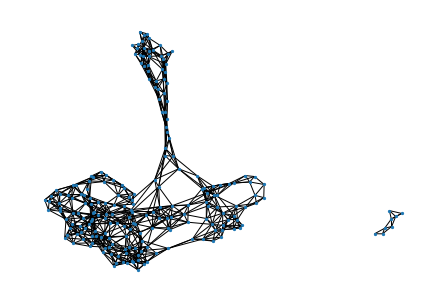

In [29]:
import MDAnalysis as mda

PDB_file = '/Volumes/Seagate_Extension_Plus/PDBs/pdb6alb.ent'
# pcn = PCN.PCN(PDB_file)
# c = pcn.get_C_alphas()
# print(c)
# c_pos = c.positions

u = mda.Universe(PDB_file)
segments = u.residues.segments

number_of_segments = len(segments)
segment_id = u.residues.segments.segids[0]

atoms_in_protein = (u.select_atoms(f'protein'))
#print(atoms_in_protein)
# for i in c:

mda_altLocs = atoms_in_protein.altLocs
alternative_locations = []
for loc in mda_altLocs:
    if loc != '':
        alternative_locations.append(loc)

alternative_locations = np.sort(list(set(alternative_locations)))
n_altLocs = len(alternative_locations)

if n_altLocs > 1:
    
    first_altLoc = alternative_locations[0]
    
    residues = atoms_in_protein.residues.resids
    #print(residues[0],residues[-1])

    CA = u.select_atoms(f'resid {residues[0]}:{residues[-1]} and name CA and segid {segment_id[0]}')
    

    for i in range(1, n_altLocs):
        print(i)
        ag = u.select_atoms(f'resid {residues[0]}:{residues[-1]} and name CA and segid {segment_id[0]} and altLoc {alternative_locations[i]}')
        #print(CA_not_i)
        CA -= ag
else:
    residues = atoms_in_protein.residues.resids

    CA = u.select_atoms(f'resid {residues[0]}:{residues[-1]} and name CA and segid {segment_id[0]}')

    
n_residues = len(atoms_in_protein.residues)

# for i in range(n_residues):
#     print(f'i: {i}, resid: {residues[i]}')

    
n_CA = len(CA)
parent_graph = nx.empty_graph(n_CA)
c_pos = CA.positions
# print(c_pos[0])
# print(c_pos[1])
# diff = c_pos[0] - c_pos[1]
# dist = np.linalg.norm(diff)
# print(diff, dist)
for i in range(n_CA):
    print(residues[i])
    for j in range(i):
        dist = np.linalg.norm(c_pos[i] - c_pos[j])
        #print(f'pos i: {i} - pos j: {j}, dist: {dist}') 
        if dist < 8:
            parent_graph.add_edge(i,j)
        
#         if i == 135:
#             print(f'pos i: {i} - pos j: {j}, dist: {dist}') 


nx.draw(parent_graph, node_size = 5)

In [36]:
subgraphs_100 = np.load('../data/subgraph_data/subgraphs_100.npy', allow_pickle=True)
subgraphs_200 = np.load('../data/subgraph_data/subgraphs_200.npy', allow_pickle=True)
subgraphs_300 = np.load('../data/subgraph_data/subgraphs_300.npy', allow_pickle=True)

print(len(subgraphs_100), len(subgraphs_200), len(subgraphs_300))



25 61 24


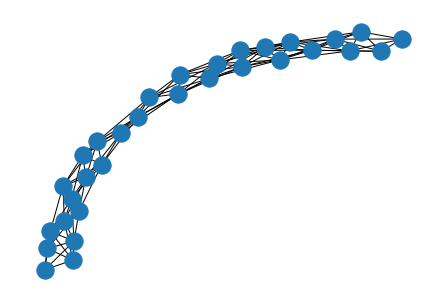

In [55]:
# for subgraph in subgraphs_100:
#     print(subgraph[0], subgraph[1])

nx.draw(subgraphs_100[15][1])